In [17]:
from src.make_db import create_movies_db

In [18]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [19]:
#import libraries and setup sql cursor
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
import requests 
import matplotlib.pyplot as plt
import seaborn as sb

conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()

In [20]:
tn_movies = pd.DataFrame(cur.execute("SELECT * FROM tn_movie_budgets").fetchall())
tn_movies.columns = [i[0] for i in cur.description]

In [21]:
# This function turns series columns into integers
def make_column_integer(df, series):
    df[series] = df[series].str.replace('$', '')
    df[series] = df[series].str.replace(',', '')
    df[series] = df[series].astype('int64')

# Turns all the columns in this dataframe into integers
make_column_integer(tn_movies, 'production_budget')
make_column_integer(tn_movies, 'domestic_gross')
make_column_integer(tn_movies, 'worldwide_gross')

<ipython-input-21-6241f826346d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[series] = df[series].str.replace('$', '')


In [22]:
#create profit colum
tn_movies["profit"] = tn_movies["worldwide_gross"] - tn_movies["production_budget"]

In [23]:
tn_movies.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [24]:
tn_movies["release_month"] = tn_movies["release_date"].str[0:3]

In [25]:
tn_movies.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_month
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Dec
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,May
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Jun
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,May
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,Dec


In [26]:
months = set(tn_movies["release_month"])

In [27]:
def groupby_unformatted_column(df, unique, unique_category, aggregate_category):
    #unique is a list of unique values of the unique category
    return_list = []
    occurances_list = []
    label_list = []
    return_dict = {}
    for item in unique:
        frame = df[df[unique_category].str.contains(item)]
        aggregate = round(frame[aggregate_category].mean(), 1)
        occurance = len(frame[aggregate_category])
        occurances_list.append(occurance)
        return_list.append(aggregate)
    return_dict = {unique_category: list(unique), aggregate_category: return_list, "occurances": occurances_list}
    df = pd.DataFrame(return_dict)
    df["labels"] = df[unique_category].astype(str) + " (" + df["occurances"].astype(str) + ")"
    df.sort_values(aggregate_category, inplace=True, ascending = False)
    return df

In [28]:
gbm_df = groupby_unformatted_column(tn_movies, months, "release_month", "profit")

In [29]:
gbm_df.head()

,release_month,profit,occurances,labels
1,May,115132808.4,407,May (407)
0,Jun,99423911.0,479,Jun (479)
7,Jul,98417458.4,440,Jul (440)
11,Nov,93141569.3,486,Nov (486)
10,Dec,68441565.3,745,Dec (745)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profit', ylabel='labels'>

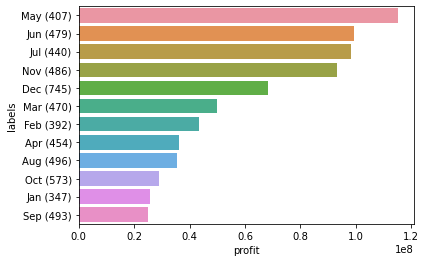

In [30]:
sb.barplot(gbm_df["profit"], gbm_df["labels"])

In [31]:
#function makes new databse with just a certain column
def get_genre_df(df, genre):
    return df[df["genres"].str.contains(genre)]

In [32]:
action = get_genre_df(tn_movies, "action")

KeyError: 'genres'